In [ ]:
!pip3 install geopandas rtree pygeos mapclassify -q geobr folium osmnx findspark requests gmplot pyspark polars polars-core polars-arrow  plotly

In [3]:
import folium
import geopandas as gpd
import rtree
import pygeos
import mapclassify
import geobr
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import display
from IPython.display import HTML
import osmnx as ox
import findspark
import requests
import plotly.express as px
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report



/usr/local/lib/python3.10/dist-packages/osmnx/geocoder.py:96: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  gdf = gdf.append(_geocode_query_to_gdf(q, wr))
/usr/local/lib/python3.10/dist-packages/geopandas/array.py:93: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
  aout[:] = out
/usr/local/lib/python3.10/dist-packages/geopandas/array.py:93: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
  aout[:] = out
/usr/local/lib/python3.10/dist-packages/osmnx/utils_geo.py:326: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shape

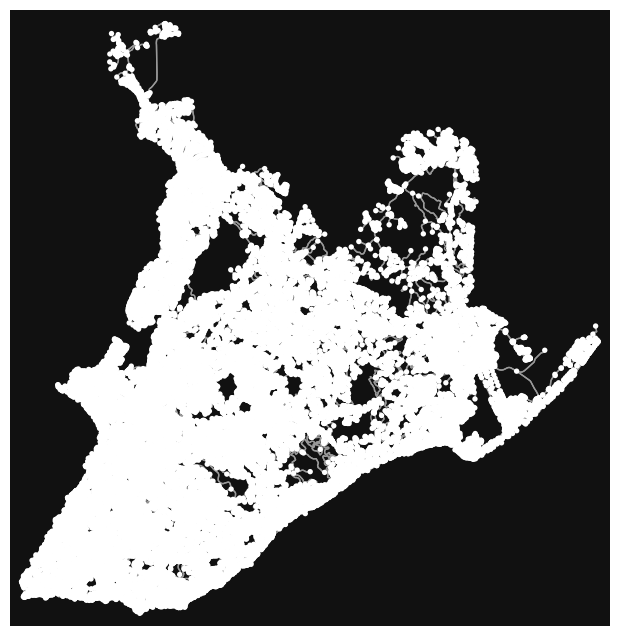

(<Figure size 800x800 with 1 Axes>, <Axes: >)

In [7]:
# Definindo o nome da cidade ou área na Bahia que você deseja obter os dados de ruas
city_name = "Salvador, Bahia, Brazil"

# Usando o OSMnx para obter os dados das ruas
graph = ox.graph_from_place(city_name, network_type="all")

ox.plot_graph(ox.project_graph(graph))


In [8]:
# Definindo o local (no caso, Salvador)
place_name = "Salvador, Bahia, Brazil"

# Baixando a rede de estradas do OpenStreetMap para Salvador
graph = ox.graph_from_place(place_name, network_type='all')

# Convertendo as arestas (estradas) em um GeoDataFrame
gdf_nodes, gdf_estradas = ox.graph_to_gdfs(graph)

# Exibindo as primeiras linhas do GeoDataFrame das estradas em Salvador
display(gdf_estradas.head())


/usr/local/lib/python3.10/dist-packages/osmnx/geocoder.py:96: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  gdf = gdf.append(_geocode_query_to_gdf(q, wr))
/usr/local/lib/python3.10/dist-packages/geopandas/array.py:93: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
  aout[:] = out
/usr/local/lib/python3.10/dist-packages/geopandas/array.py:93: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
  aout[:] = out
/usr/local/lib/python3.10/dist-packages/osmnx/utils_geo.py:326: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shape

osmid  oneway lanes                                 name      highway  \
0  778906705    True     1              Avenida Anita Garibaldi     tertiary   
1  802064026    True     3              Avenida Anita Garibaldi      primary   
2   53568908   False   NaN                 Rua Primeiro de Maio  residential   
3  656623303   False   NaN  Travessa Primeiro de Maio de Itapuã  residential   
4  656623303   False   NaN  Travessa Primeiro de Maio de Itapuã  residential   

    length                                           geometry maxspeed  \
0   19.054  LINESTRING (-38.50691 -12.99551, -38.50688 -12...      NaN   
1   77.998  LINESTRING (-38.50691 -12.99551, -38.50697 -12...       70   
2  120.202  LINESTRING (-38.36150 -12.93906, -38.36141 -12...      NaN   
3   65.880  LINESTRING (-38.36150 -12.93906, -38.36169 -12...      NaN   
4   78.133  LINESTRING (-38.36150 -12.93906, -38.36136 -12...      NaN   

  service width access bridge junction  ref tunnel           u           v  \
0     NaN   NaN    NaN    NaN      NaN  NaN    NaN  7266893825  7272463260   
1     NaN   NaN    NaN    NaN      NaN  NaN    NaN  7266893825   735126305   
2     NaN   NaN    NaN    NaN      NaN  NaN    NaN  7238713350  7239080014   
3     NaN   NaN    NaN    NaN      NaN  NaN    NaN  7238713350   676744998   
4     NaN   NaN    NaN    NaN      NaN  NaN    NaN  7238713350   676737608   

   key  
0    0  
1    0  
2    0  
3    0  
4    0

In [102]:
# Carregando os dados das estradas
place_name = "Salvador, Bahia, Brazil"
graph = ox.graph_from_place(place_name, network_type='all')
gdf_nodes, gdf_estradas = ox.graph_to_gdfs(graph)

# Carregando os dados dos acidentes
dados_acidentes = pd.read_csv("demostrativo_acidentes_bahia_corrigido.csv", delimiter=";")


/usr/local/lib/python3.10/dist-packages/osmnx/geocoder.py:96: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

/usr/local/lib/python3.10/dist-packages/geopandas/array.py:93: ShapelyDeprecationWarning:

__len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.

/usr/local/lib/python3.10/dist-packages/geopandas/array.py:93: ShapelyDeprecationWarning:

__len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.

/usr/local/lib/python3.10/dist-packages/osmnx/utils_geo.py:326: ShapelyDeprecationWarning:

Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a mult

In [103]:
acidentes_por_trecho = dados_acidentes['Trecho'].value_counts().reset_index()
acidentes_por_trecho.columns = ['Trecho', 'Número de Acidentes']


In [105]:
print(gdf_estradas.columns)


Index(['osmid', 'oneway', 'lanes', 'name', 'highway', 'length', 'geometry',
       'maxspeed', 'service', 'width', 'access', 'bridge', 'junction', 'ref',
       'tunnel', 'u', 'v', 'key'],
      dtype='object')


In [108]:
# Convertendo a coluna 'Trecho' em acidentes_por_trecho em uma string única separada por vírgulas
acidentes_por_trecho['Trecho_str'] = acidentes_por_trecho['Trecho'].apply(lambda x: ', '.join(x) if isinstance(x, list) else str(x))

# Criando uma nova coluna 'Trecho_str' em gdf_estradas com os mesmos valores da coluna 'name' (como string)
gdf_estradas['Trecho_str'] = gdf_estradas['name'].astype(str)

# Mesclando os dados de acidentes com os dados das estradas em Salvador usando 'Trecho_str' como chave
estradas_com_acidentes = gdf_estradas.merge(acidentes_por_trecho, on='Trecho_str', how='left')

# Exibindo as primeiras linhas do GeoDataFrame com dados de acidentes
print(estradas_com_acidentes.head())


       osmid  oneway lanes                                 name      highway  \
0  778906705    True     1              Avenida Anita Garibaldi     tertiary   
1  802064026    True     3              Avenida Anita Garibaldi      primary   
2   53568908   False   NaN                 Rua Primeiro de Maio  residential   
3  656623303   False   NaN  Travessa Primeiro de Maio de Itapuã  residential   
4  656623303   False   NaN  Travessa Primeiro de Maio de Itapuã  residential   

    length                                           geometry maxspeed  \
0   19.054  LINESTRING (-38.50691 -12.99551, -38.50688 -12...      NaN   
1   77.998  LINESTRING (-38.50691 -12.99551, -38.50697 -12...       70   
2  120.202  LINESTRING (-38.36150 -12.93906, -38.36141 -12...      NaN   
3   65.880  LINESTRING (-38.36150 -12.93906, -38.36169 -12...      NaN   
4   78.133  LINESTRING (-38.36150 -12.93906, -38.36136 -12...      NaN   

  service width  ... bridge junction  ref tunnel           u           v  

In [109]:
# Classificando o DataFrame com base no número de acidentes em ordem decrescente
estradas_com_acidentes = estradas_com_acidentes.sort_values(by='Número de Acidentes', ascending=False)

# Exibindo as primeiras linhas das estradas com mais acidentes
print(estradas_com_acidentes.head())


       osmid  oneway lanes                                 name      highway  \
0  778906705    True     1              Avenida Anita Garibaldi     tertiary   
1  802064026    True     3              Avenida Anita Garibaldi      primary   
2   53568908   False   NaN                 Rua Primeiro de Maio  residential   
3  656623303   False   NaN  Travessa Primeiro de Maio de Itapuã  residential   
4  656623303   False   NaN  Travessa Primeiro de Maio de Itapuã  residential   

    length                                           geometry maxspeed  \
0   19.054  LINESTRING (-38.50691 -12.99551, -38.50688 -12...      NaN   
1   77.998  LINESTRING (-38.50691 -12.99551, -38.50697 -12...       70   
2  120.202  LINESTRING (-38.36150 -12.93906, -38.36141 -12...      NaN   
3   65.880  LINESTRING (-38.36150 -12.93906, -38.36169 -12...      NaN   
4   78.133  LINESTRING (-38.36150 -12.93906, -38.36136 -12...      NaN   

  service width  ... bridge junction  ref tunnel           u           v  

In [129]:
# Criando o gráfico Mapbox
fig = px.scatter_mapbox(
    estradas_com_acidentes,
    lat=estradas_com_acidentes.geometry.centroid.y,
    lon=estradas_com_acidentes.geometry.centroid.x,
    color='Número de Acidentes',
    hover_name='name',
    hover_data=['Número de Acidentes'],
    title='Estradas com Base no Número de Acidentes',
    color_continuous_scale='Viridis',  # Personalize a paleta de cores
    size_max=15,  # Aumente o tamanho dos marcadores
)

# Personalizando o layout do mapa
fig.update_layout(
    mapbox_style='open-street-map',
    mapbox_zoom=10,
    coloraxis_colorbar=dict(title='Número de Acidentes'),  # Adicione uma legenda
)

# Exibindo o mapa interativo
fig.show()


/usr/local/lib/python3.10/dist-packages/geopandas/array.py:546: ShapelyDeprecationWarning:

The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.

/usr/local/lib/python3.10/dist-packages/geopandas/geoseries.py:128: ShapelyDeprecationWarning:

The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.



In [37]:
unique_dates = dados_acidentes['Data'].unique()
print(unique_dates)


shape: (4_809,)
Series: 'Data' [str]
[
	"03/04/2010"
	"30/10/2014"
	"12/08/2010"
	"03/08/2014"
	"23/02/2014"
	"14/06/2020"
	"22/05/2017"
	"08/12/2012"
	"05/05/2021"
	"10/12/2010"
	"03/05/2011"
	"16/03/2017"
	…
	"24/07/2023"
	"06/07/2010"
	"03/07/2012"
	"25/06/2022"
	"07/02/2013"
	"17/02/2020"
	"20/10/2018"
	"15/12/2022"
	"28/03/2023"
	"22/12/2014"
	"30/03/2015"
	"28/04/2011"
	"04/05/2018"
]


In [132]:


# Lendo o arquivo CSV
# Certificando se o delimitador (sep) esteja correto
dados_acidentes = pd.read_csv("demostrativo_acidentes_bahia.csv", sep=';')

# Verificando o cabeçalho das colunas
print(dados_acidentes.columns)

# Renomeiando as colunas, se necessário (substitua 'NomeIncorreto' pelos nomes corretos)
dados_acidentes.rename(columns={'NomeIncorreto': 'NomeCorreto'}, inplace=True)

# Verificando o formato das datas
print(dados_acidentes['Data'].head())

# Corrijindo o formato das datas, se necessário
dados_acidentes['Data'] = pd.to_datetime(dados_acidentes['Data'], format='%d/%m/%Y')

# Salvando o arquivo corrigido, se desejar
dados_acidentes.to_csv("demostrativo_acidentes_bahia_corrigido.csv", index=False)


Index(['Concessionaria', 'Data', 'Km', 'Trecho'], dtype='object')
0    01/04/2010
1    01/04/2010
2    01/04/2010
3    01/04/2010
4    01/04/2010
Name: Data, dtype: object


In [126]:

dados_acidentes = pd.read_csv("demostrativo_acidentes_bahia.csv", sep=';')

print(dados_acidentes['Data'].head())

# Corrijindo o formato das datas convertendo para tipo de data
dados_acidentes['Data'] = pd.to_datetime(dados_acidentes['Data'], format='%d/%m/%Y')

# Verificando novamente o formato das datas após a conversão
print(dados_acidentes['Data'].head())


0    01/04/2010
1    01/04/2010
2    01/04/2010
3    01/04/2010
4    01/04/2010
Name: Data, dtype: object
0   2010-04-01
1   2010-04-01
2   2010-04-01
3   2010-04-01
4   2010-04-01
Name: Data, dtype: datetime64[ns]


In [127]:
# Lendo o arquivo CSV original
arquivo_original = "demostrativo_acidentes_bahia.csv"
df = pd.read_csv(arquivo_original, delimiter=";")

# Corrigindo formato das datas
df['Data'] = pd.to_datetime(df['Data'], format='%d/%m/%Y')

# Substituindo vírgulas por pontos nos valores numéricos
df['Km'] = df['Km'].str.replace(',', '.', regex=False).astype(float)

# Salvando o arquivo corrigido
arquivo_corrigido = "demostrativo_acidentes_bahia_corrigido.csv"
df.to_csv(arquivo_corrigido, index=False, sep=";")

print("Arquivo corrigido salvo como:", arquivo_corrigido)


Arquivo corrigido salvo como: demostrativo_acidentes_bahia_corrigido.csv


In [128]:
# Carregndo o arquivo CSV
df = pd.read_csv("demostrativo_acidentes_bahia.csv", delimiter=";")  # Certifique-se de ajustar o delimitador se necessário

# Listando as colunas do DataFrame
colunas = df.columns

# Exibindo as colunas
print(colunas)


Index(['Concessionaria', 'Data', 'Km', 'Trecho'], dtype='object')


In [74]:
# Carregando o arquivo CSV corrigido
dados_acidentes = pd.read_csv("demostrativo_acidentes_bahia_corrigido.csv", delimiter=";")

# Codificando as variáveis categóricas usando one-hot encoding
dados_acidentes = pd.get_dummies(dados_acidentes, columns=['Concessionaria'])

# Dividindo os dados em treinamento e teste
X = dados_acidentes.drop(['Trecho', 'Data'], axis=1)
y = dados_acidentes['Trecho']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Treinando do modelo (exemplo com Random Forest)
modelo = RandomForestClassifier()
modelo.fit(X_train, y_train)

# Fazendo previsões
y_pred = modelo.predict(X_test)

# Avaliando o modelo
acurácia = accuracy_score(y_test, y_pred)
relatório_classificação = classification_report(y_test, y_pred)

print(f'Acurácia do modelo: {acurácia}')
print('Relatório de classificação:')
print(relatório_classificação)




Acurácia do modelo: 0.9060027919962773
Relatório de classificação:
                       precision    recall  f1-score   support

               526/BA       0.00      0.00      0.00         6
               528/BA       0.00      0.00      0.00         1
               BA-526       0.00      0.00      0.00        57
               BA-528       0.00      0.00      0.00         5
            BR-116/BA       0.97      0.84      0.90      3393
  BR-116/BA - Cont VC       0.81      0.89      0.85       321
 BR-116/BA - ContSuFS       0.66      0.91      0.77       207
            BR-324/BA       0.89      0.98      0.93      4559
     CONTORNO - VC/BA       0.00      0.00      0.00        30
CONTORNO SUL  - FS/BA       0.00      0.00      0.00        17

             accuracy                           0.91      8596
            macro avg       0.33      0.36      0.34      8596
         weighted avg       0.90      0.91      0.90      8596



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



In [75]:
dados_acidentes = pd.read_csv("demostrativo_acidentes_bahia_corrigido.csv", delimiter=";")

# Agrupando os dados por rodovia (Trecho) e conte o número de acidentes em cada rodovia
rodovias_com_acidentes = dados_acidentes['Trecho'].value_counts()

# Exibindo as rodovias com mais acidentes (por exemplo, as 10 primeiras)
top_rodovias = rodovias_com_acidentes.head(10)

print("Rodovias com mais acidentes:")
print(top_rodovias)


Rodovias com mais acidentes:
BR-324/BA                       23102
BR-116/BA                       16728
BR-116/BA - Cont VC              1588
BR-116/BA - ContSuFS             1005
BA-526                            240
CONTORNO - VC/BA                  180
CONTORNO SUL  - FS/BA              53
BA-528                             41
526/BA                             30
CONTORNO NORTE - FS - 116/BA        7
Name: Trecho, dtype: int64


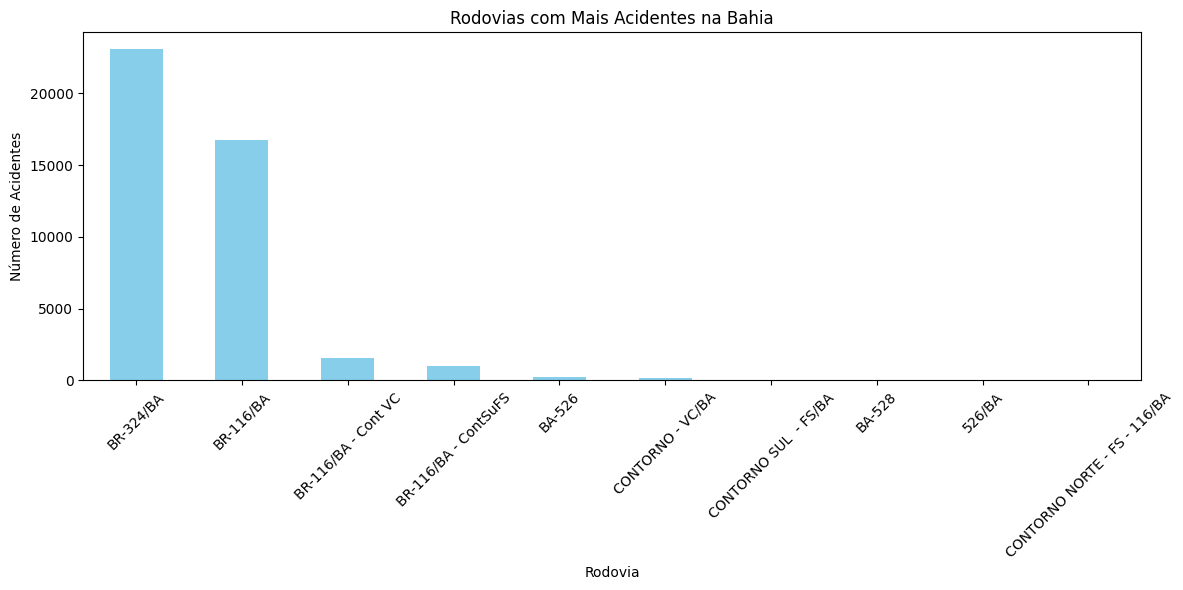

In [87]:
dados_acidentes = pd.read_csv("demostrativo_acidentes_bahia_corrigido.csv", delimiter=";")

# Calculando o número de acidentes por rodovia
acidentes_por_rodovia = dados_acidentes['Trecho'].value_counts()

# Escolhendo o número de rodovias principais que deseja mostrar no gráfico (por exemplo, as top 10)
top_rodovias = acidentes_por_rodovia.head(10)

# Criando um gráfico de barras para mostrar as rodovias com mais acidentes
plt.figure(figsize=(12, 6))
top_rodovias.plot(kind='bar', color='skyblue')
plt.title('Rodovias com Mais Acidentes na Bahia')
plt.xlabel('Rodovia')
plt.ylabel('Número de Acidentes')
plt.xticks(rotation=45)
plt.tight_layout()

# Exibindo o gráfico
plt.show()
